# Knn Classifier

In [12]:
import pandas as pd
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from sklearn.pipeline import Pipeline
from PIL import Image as pil_image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# load VGG16 model

image.LOAD_TRUNCATED_IMAGES = True 
model = VGG16(weights='imagenet', include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
df = pd.read_csv("../data/imageDataSet.csv")
df.head()

,1109,1111,1621,1623,2133,4693,4695,5193,5207,5319,...,23460,23484,23739,25230,25275,25742,26254,26556,27068,Target
0,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0,54.366783,0.0,0.0,...,97.608917,14.459715,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
1,0.000000,0.0,0.000000,0.0,15.3224,0.000000,0.0,0.000000,0.0,0.0,...,24.481390,0.000000,2.560059,0.0,23.686781,0.0,0.0,0.0,0.0,1
2,59.974754,0.0,3.246423,0.0,0.0000,0.000000,0.0,3.179555,0.0,0.0,...,34.729649,26.950748,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
3,3.362229,0.0,0.000000,0.0,0.0000,5.895135,0.0,26.151339,0.0,0.0,...,65.901802,19.239208,0.000000,0.0,4.102757,0.0,0.0,0.0,0.0,1
4,19.702305,0.0,0.000000,0.0,0.0000,11.719869,0.0,0.000000,0.0,0.0,...,6.159858,23.088205,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1


In [4]:
df.describe()

,1109,1111,1621,1623,2133,4693,4695,5193,5207,5319,...,23460,23484,23739,25230,25275,25742,26254,26556,27068,Target
count,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,...,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000
mean,4.040372,3.528938,4.254859,5.598890,4.104270,4.514559,3.562409,9.847489,5.464438,4.750968,...,23.198622,12.743075,7.269276,7.117648,7.801685,8.617077,7.324164,11.671323,11.377451,0.281658
std,12.418808,13.038516,12.798700,18.238018,12.659234,12.758470,12.463156,20.089922,17.302362,14.936070,...,40.204136,22.079208,16.647147,21.324532,18.136930,23.815868,21.932163,21.270480,21.259357,0.449828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.236202,0.000000,0.000000,...,32.687012,18.349894,4.446409,0.000000,4.891489,0.000000,0.000000,16.120316,14.850579,1.000000
max,127.861900,123.599724,108.574036,144.560486,110.275536,118.405060,177.059387,175.948593,177.740250,147.352890,...,329.885895,166.452866,166.121902,205.357239,174.718369,237.296677,232.806412,187.903137,189.659073,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10953 entries, 0 to 10952
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1109    10953 non-null  float64
 1   1111    10953 non-null  float64
 2   1621    10953 non-null  float64
 3   1623    10953 non-null  float64
 4   2133    10953 non-null  float64
 5   4693    10953 non-null  float64
 6   4695    10953 non-null  float64
 7   5193    10953 non-null  float64
 8   5207    10953 non-null  float64
 9   5319    10953 non-null  float64
 10  8683    10953 non-null  float64
 11  8777    10953 non-null  float64
 12  9170    10953 non-null  float64
 13  9200    10953 non-null  float64
 14  9289    10953 non-null  float64
 15  9392    10953 non-null  float64
 16  9636    10953 non-null  float64
 17  9692    10953 non-null  float64
 18  10148   10953 non-null  float64
 19  10204   10953 non-null  float64
 20  10660   10953 non-null  float64
 21  10825   10953 non-null  float64
 22

In [6]:
df.describe()

,1109,1111,1621,1623,2133,4693,4695,5193,5207,5319,...,23460,23484,23739,25230,25275,25742,26254,26556,27068,Target
count,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,...,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000
mean,4.040372,3.528938,4.254859,5.598890,4.104270,4.514559,3.562409,9.847489,5.464438,4.750968,...,23.198622,12.743075,7.269276,7.117648,7.801685,8.617077,7.324164,11.671323,11.377451,0.281658
std,12.418808,13.038516,12.798700,18.238018,12.659234,12.758470,12.463156,20.089922,17.302362,14.936070,...,40.204136,22.079208,16.647147,21.324532,18.136930,23.815868,21.932163,21.270480,21.259357,0.449828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.236202,0.000000,0.000000,...,32.687012,18.349894,4.446409,0.000000,4.891489,0.000000,0.000000,16.120316,14.850579,1.000000
max,127.861900,123.599724,108.574036,144.560486,110.275536,118.405060,177.059387,175.948593,177.740250,147.352890,...,329.885895,166.452866,166.121902,205.357239,174.718369,237.296677,232.806412,187.903137,189.659073,1.000000


## Remove target from dataframe

In [7]:
target = df[['Target']]
df.drop('Target',axis=1,inplace=True)

df.head()

,1109,1111,1621,1623,2133,4693,4695,5193,5207,5319,...,23004,23460,23484,23739,25230,25275,25742,26254,26556,27068
0,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0,54.366783,0.0,0.0,...,0.0,97.608917,14.459715,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,15.3224,0.000000,0.0,0.000000,0.0,0.0,...,0.0,24.481390,0.000000,2.560059,0.0,23.686781,0.0,0.0,0.0,0.0
2,59.974754,0.0,3.246423,0.0,0.0000,0.000000,0.0,3.179555,0.0,0.0,...,0.0,34.729649,26.950748,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,3.362229,0.0,0.000000,0.0,0.0000,5.895135,0.0,26.151339,0.0,0.0,...,0.0,65.901802,19.239208,0.000000,0.0,4.102757,0.0,0.0,0.0,0.0
4,19.702305,0.0,0.000000,0.0,0.0000,11.719869,0.0,0.000000,0.0,0.0,...,0.0,6.159858,23.088205,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


## Normalize and split dataframe

In [8]:
y = target['Target']
X = df

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=42)

In [9]:
X_train.columns

Index(['1109', '1111', '1621', '1623', '2133', '4693', '4695', '5193', '5207',
       '5319', '8683', '8777', '9170', '9200', '9289', '9392', '9636', '9692',
       '10148', '10204', '10660', '10825', '11760', '12754', '12779', '13266',
       '13385', '13732', '13788', '14244', '14756', '14921', '15268', '16875',
       '16969', '17316', '17481', '17591', '17690', '17723', '17828', '17852',
       '17870', '17884', '18103', '18202', '18340', '18615', '18714', '18747',
       '18852', '19226', '19364', '21687', '21924', '21948', '22199', '22436',
       '22460', '22711', '22810', '22948', '22972', '23004', '23460', '23484',
       '23739', '25230', '25275', '25742', '26254', '26556', '27068'],
      dtype='object')

In [10]:
# Normalize dataset

scaler_train = MinMaxScaler()
X_train = scaler_train.fit_transform(X_train)

scaler_test = MinMaxScaler()
X_test = scaler_test.fit_transform(X_test)


## Create KNN model and get the best "k"

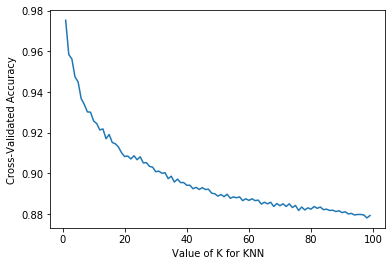

The best k is:  1
The best accuracy is:  0.9752190615668674


In [11]:

k_value = 0
k_index = 0
k_scores = []
k_miss = []

for i in range(1, 100):    
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=i), X_train, y_train, cv=5)
    accuracy = scores.mean()
    k_scores.append(scores.mean())
    k_miss.append(1 - scores.mean())
    
    if(accuracy > k_value):
        k_value = accuracy
        k_index = i 
    
    

plt.plot(range(1, 100), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print('The best k is: ', k_index)
print('The best accuracy is: ', k_value)

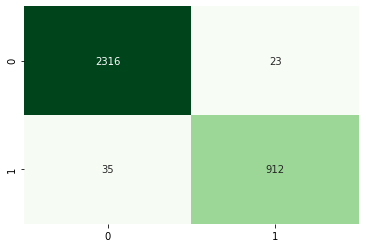

In [17]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Greens", fmt="d")

In [19]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.99      0.99      0.99      2339
           1       0.98      0.96      0.97       947

    accuracy                           0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286

